In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

DATA_FILE_PATH = 'datasets/Life_Expectancy_Data.csv'
# DATA_FILE_PATH = 'datasets/Salary_data.csv'

data_raw = pd.read_csv(filepath_or_buffer=DATA_FILE_PATH)
data_raw = data_raw.dropna()
data_raw.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
def standarized(x, columns):
    """Standarize column values"""
    x_std = x.copy(deep=True)
    for column in columns:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 

to_standarize = ['Schooling', 'Life expectancy ','Income composition of resources']
data_std = standarized(data_raw,to_standarize)
data_std.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,-0.489074,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,-0.833209,-0.722580
1,Afghanistan,2014,Developing,-1.068828,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,-0.849595,-0.758353
2,Afghanistan,2013,Developing,-1.068828,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,-0.882366,-0.794126
3,Afghanistan,2012,Developing,-1.114299,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,-0.920599,-0.829900
4,Afghanistan,2011,Developing,-1.148402,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,-0.969755,-0.937219


In [47]:
def iterate(*arrays, size=1):
    for i in range(math.ceil(len(arrays[0][0])/size)):
        yield map(lambda arr: np.array([a[i * size:(i + 1) * size] for a in arr]), arrays)

def cost(Y_pred, Y): return ((Y_pred-Y)**2).sum() / Y.shape[0]

def predict(theta, X): return theta.T.dot(X)

def lasso_regression(X , Y, epochs, batch_size, learning_rate=10**-6, penalty=1):
    n_features =  X.shape[0]
    n_data = X.shape[1]
    batch_size = min(n_data, batch_size)

    theta = np.zeros([n_features, 1])
    costs = []

    for _ in range(epochs):
        for sX, sY in iterate(X, Y, size=batch_size):
            sY_pred = predict(theta, sX)

            grad = (sX.dot((sY_pred - sY).T) - abs(penalty * theta)) / batch_size
            theta -= learning_rate * grad

            _cost = cost(sY_pred, sY)
            costs.append(_cost)

    return theta, costs

In [12]:
def to_x_data(df, *columns):
    n = len(df)
    x0 = np.ones([1, n])
    xn = np.array([df[column] for column in columns])
    return np.concatenate((x0, xn), axis = 0)

def get_data(df, X_features, Y_feature):
    X = to_x_data(df, *X_features)
    Y = np.array([df[Y_feature]])
    return X, Y

X_features = ['Schooling']
Y_feature = 'Life expectancy '
# X_features = ['YearsExperience']
# Y_feature = 'Salary'

data = data_raw
data_size = len(data)
X, Y = get_data(data, X_features, Y_feature)

In [58]:
def to_equation(theta, features):
    vals = list(map(lambda v: str(round(v,2)), theta))
    return f"y = {vals[0]} + {' + '.join([f'{t}*{f}' for t, f in zip(vals[1:], features)])}"

config = {
    'epochs' : 500,
    'batch_size' : 1000,
    'learning_rate': 10**-2,
    'penalty': 0,
}

theta, costs = lasso_regression(X, Y, **config)
Y_pred = predict(theta, X)[0]
print(to_equation(theta.flatten(), X_features))

config = {
    'epochs' : 500,
    'batch_size' : 1000,
    'learning_rate': 10**-2,
    'penalty': 100,
}
theta_lasso, costs = lasso_regression(X, Y, **config)
Y_pred_lasso = predict(theta_lasso, X)[0]
print(to_equation(theta_lasso.flatten(), X_features))



y = 14.45 + 4.43*Schooling
y = 23.67 + 3.7*Schooling


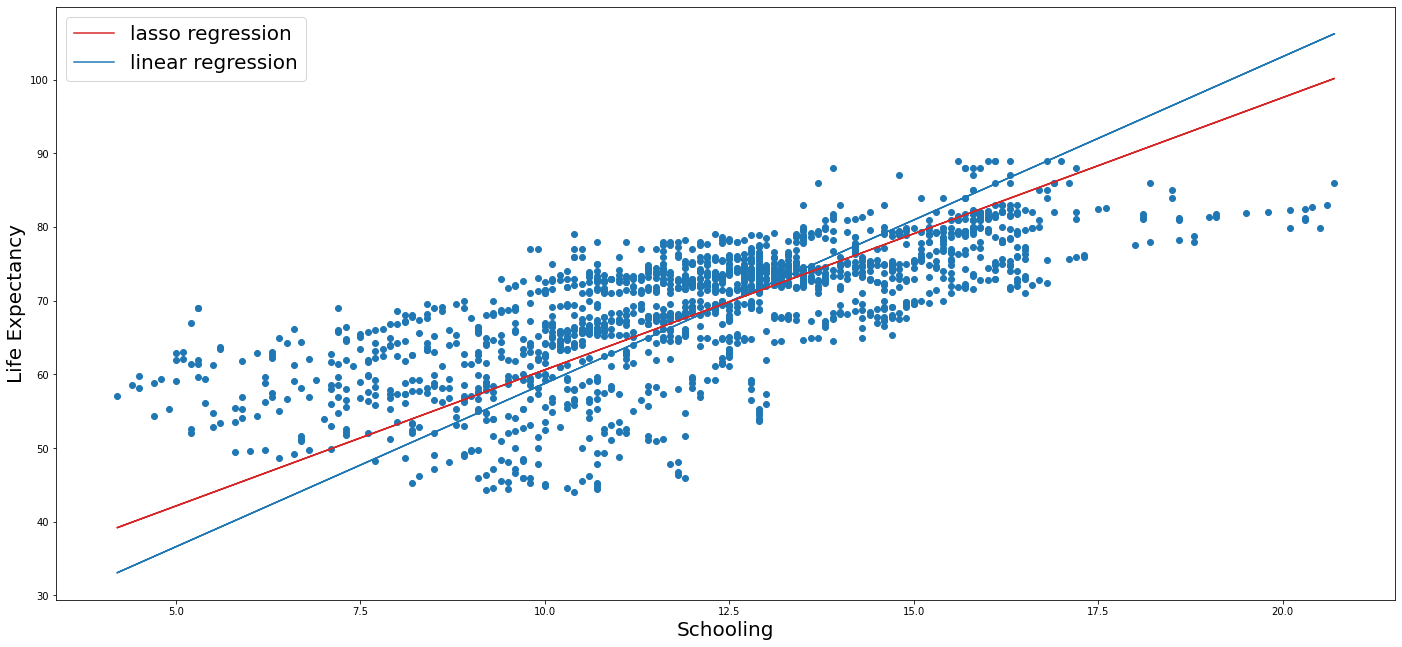

In [59]:


figsize = (24,24)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(2,1,1)
ax.set_ylabel('Life Expectancy',fontsize=20)
ax.set_xlabel('Schooling',fontsize=20)
ax.scatter(X[1], Y)
linear_plot, = ax.plot(X[1], Y_pred)
lasso_plot, = ax.plot(X[1], Y_pred_lasso, color='tab:red')
ax.legend([lasso_plot,linear_plot],['lasso regression','linear regression'], prop={'size':20})
